# Analytics Olympiad 2022 Hackathon

In [122]:
## Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report
from sklearn import svm

from warnings import filterwarnings
filterwarnings('ignore')

In [123]:
df_train = pd.read_csv(r"C:\Users\Shree\Desktop\DS Projects\Analytics Olymipad\AnalyticsOlympiad2022Data\train.csv")
df_train.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,0.0,0.0,37379,11000.0,0,0,0,0.0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,1.0,0.0,10238,9000.0,0,0,0,1.0,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,1.0,1.0,10238,12000.0,0,0,0,1.0,Sedan
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,0.0,1.0,92099,6000.0,1,0,0,1.0,Sedan
4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,1.0,1.0,32122,15000.0,0,0,1,0.0,Sedan


In [124]:
df_test = pd.read_csv(r"C:\Users\Shree\Desktop\DS Projects\Analytics Olymipad\AnalyticsOlympiad2022Data\test.csv")
df_test.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE
0,352928,40-64,male,10-19y,none,working class,0.814707,1.0,after 2015,0.0,1.0,10238,10000.0,0,0,0,HatchBack
1,38579,26-39,female,20-29y,high school,upper class,0.344051,1.0,before 2015,0.0,0.0,34073,13000.0,0,0,0,Sedan
2,504022,40-64,male,10-19y,none,upper class,0.620691,0.0,after 2015,1.0,0.0,10238,12000.0,0,0,0,SUV
3,202404,26-39,male,20-29y,high school,upper class,0.689658,1.0,after 2015,1.0,1.0,10238,16000.0,1,0,0,SUV
4,527913,65+,male,10-19y,none,middle class,0.755666,0.0,after 2015,0.0,1.0,92101,14000.0,2,0,0,HatchBack


In [125]:
print(f"Train data shape : {df_train.shape}")
print(f"Test data shape : {df_test.shape}")

Train data shape : (105000, 18)
Test data shape : (45000, 17)


In [126]:
## Get a concise summary of a DataFrame.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   105000 non-null  int64  
 1   AGE                  105000 non-null  object 
 2   GENDER               105000 non-null  object 
 3   DRIVING_EXPERIENCE   105000 non-null  object 
 4   EDUCATION            105000 non-null  object 
 5   INCOME               105000 non-null  object 
 6   CREDIT_SCORE         105000 non-null  float64
 7   VEHICLE_OWNERSHIP    105000 non-null  float64
 8   VEHICLE_YEAR         105000 non-null  object 
 9   MARRIED              105000 non-null  float64
 10  CHILDREN             105000 non-null  float64
 11  POSTAL_CODE          105000 non-null  int64  
 12  ANNUAL_MILEAGE       105000 non-null  float64
 13  SPEEDING_VIOLATIONS  105000 non-null  int64  
 14  DUIS                 105000 non-null  int64  
 15  PAST_ACCIDENTS   

In [127]:
df_train["MARRIED"].value_counts()

1.0    61335
0.0    43665
Name: MARRIED, dtype: int64

In [128]:
df_train["CHILDREN"].value_counts()

1.0    54600
0.0    50400
Name: CHILDREN, dtype: int64

In [129]:
# Change datatype to category
df_train["MARRIED"] = df_train["MARRIED"].astype('category')
df_train["CHILDREN"] = df_train["CHILDREN"].astype('category')
df_train["OUTCOME"] = df_train["OUTCOME"].astype('category')
df_train["VEHICLE_OWNERSHIP"] = df_train["VEHICLE_OWNERSHIP"].astype('category')

In [130]:
## Generate descriptive statistics.
df_train.describe()

,ID,CREDIT_SCORE,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
count,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000
mean,394931.295905,0.602173,18045.439267,11061.228571,0.675676,0.129733,0.549314
std,279694.106053,0.138045,16709.040449,2972.355482,1.383678,0.589714,1.402809
min,101.000000,0.066880,10238.000000,2000.000000,0.000000,0.000000,0.000000
25%,156351.750000,0.514876,10238.000000,9000.000000,0.000000,0.000000,0.000000
50%,354679.500000,0.601112,10238.000000,11000.000000,0.000000,0.000000,0.000000
75%,598602.250000,0.703216,22957.750000,13000.000000,1.000000,0.000000,0.000000
max,999976.000000,0.954075,92101.000000,21000.000000,20.000000,6.000000,15.000000


In [131]:
## Generate descriptive statistics for categorical data.
df_train.describe(include='object')

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,TYPE_OF_VEHICLE
count,105000,105000,105000,105000,105000,105000,105000
unique,4,2,4,3,4,2,4
top,40-64,male,20-29y,high school,upper class,before 2015,Sports Car
freq,33716,65317,37493,46590,51271,57511,34592


In [132]:
df_train["OUTCOME"].value_counts()

0.0    60622
1.0    44378
Name: OUTCOME, dtype: int64

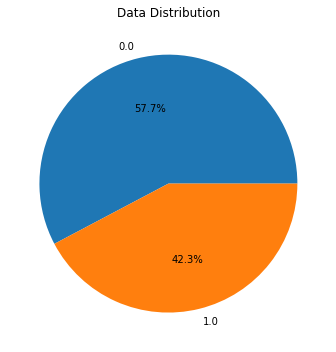

In [133]:
plt.figure(figsize=(5,5))
plt.pie(x=df_train['OUTCOME'].value_counts().values,labels=df_train['OUTCOME'].value_counts().index,autopct='%1.1f%%')
plt.title("Data Distribution")
plt.tight_layout()

## Handling Missing Values

In [134]:
## Check for null values
df_train.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
TYPE_OF_VEHICLE        0
dtype: int64

## Exploratory Data Analysis

In [135]:
num_list = [i for i in df_train.columns if (df_train[i].dtype == 'int64') or (df_train[i].dtype == 'float64') ]
num_list

['ID',
 'CREDIT_SCORE',
 'POSTAL_CODE',
 'ANNUAL_MILEAGE',
 'SPEEDING_VIOLATIONS',
 'DUIS',
 'PAST_ACCIDENTS']

In [136]:
cat_list = [i for i in df_train.columns if i not in num_list]
cat_list

['AGE',
 'GENDER',
 'DRIVING_EXPERIENCE',
 'EDUCATION',
 'INCOME',
 'VEHICLE_OWNERSHIP',
 'VEHICLE_YEAR',
 'MARRIED',
 'CHILDREN',
 'OUTCOME',
 'TYPE_OF_VEHICLE']

In [137]:
#sns.pairplot(data=df_train,vars=[ 'CREDIT_SCORE','VEHICLE_OWNERSHIP','ANNUAL_MILEAGE',
                                 #'SPEEDING_VIOLATIONS','DUIS','PAST_ACCIDENTS'],hue='OUTCOME')

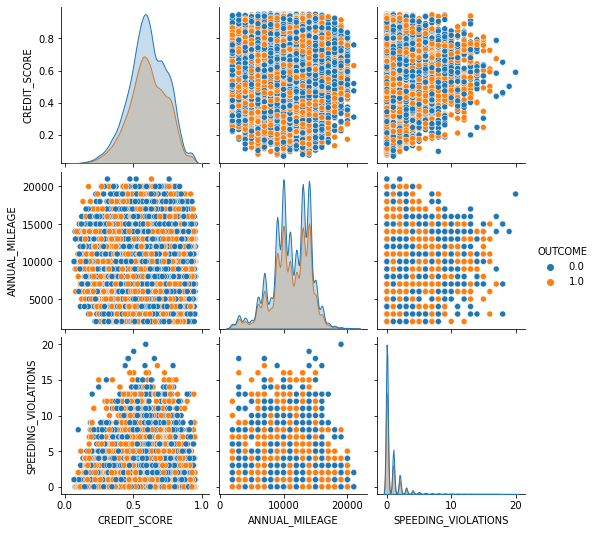

In [138]:
sns.pairplot(data=df_train,vars=['CREDIT_SCORE','ANNUAL_MILEAGE','SPEEDING_VIOLATIONS'],hue='OUTCOME')

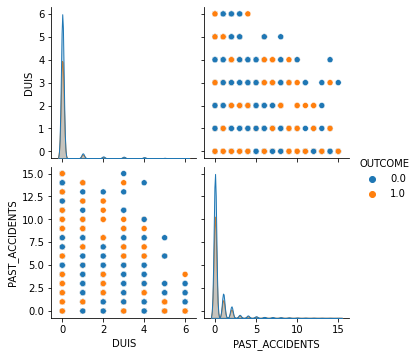

In [139]:
sns.pairplot(data=df_train,vars=['DUIS','PAST_ACCIDENTS'],hue='OUTCOME')

<AxesSubplot:xlabel='GENDER', ylabel='count'>

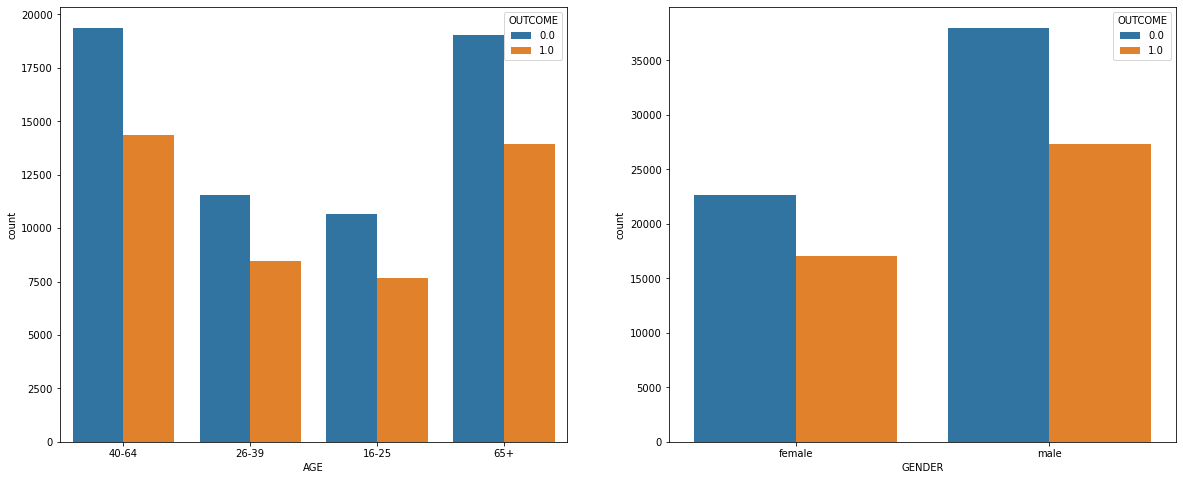

In [140]:
plt.figure(figsize=(20,8))

# Age & Outcome
plt.subplot(1,2,1)
sns.countplot(x='AGE',hue='OUTCOME',data=df_train)

# Gender & Outcome
plt.subplot(1,2,2)
sns.countplot(x='GENDER',hue='OUTCOME',data=df_train)

<AxesSubplot:xlabel='INCOME', ylabel='count'>

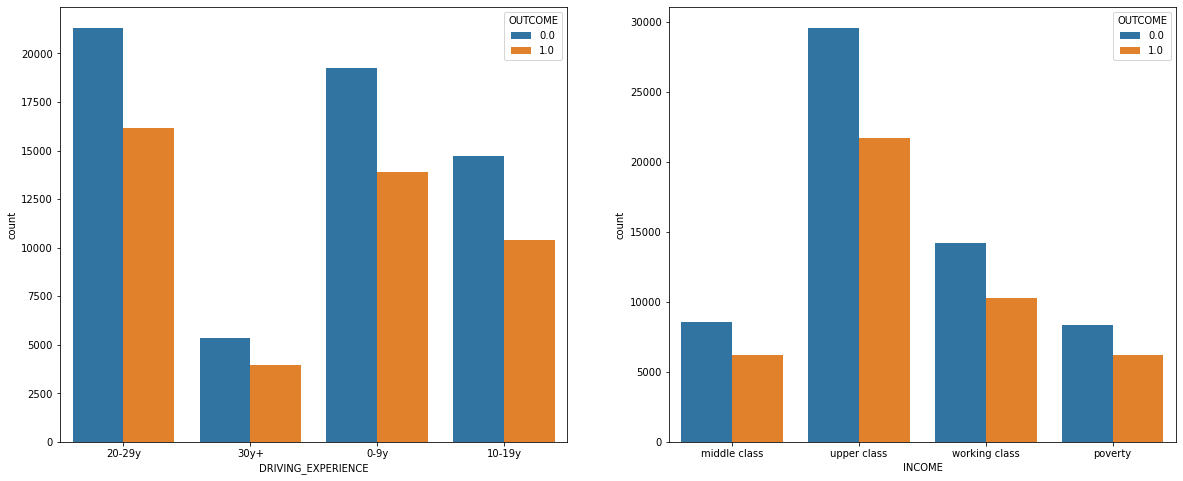

In [141]:
plt.figure(figsize=(20,8))

# Driving Experience & Outcome
plt.subplot(1,2,1)
sns.countplot(x='DRIVING_EXPERIENCE',hue='OUTCOME',data=df_train)

# Income & Outcome
plt.subplot(1,2,2)
sns.countplot(x='INCOME',hue='OUTCOME',data=df_train)

<AxesSubplot:xlabel='TYPE_OF_VEHICLE', ylabel='count'>

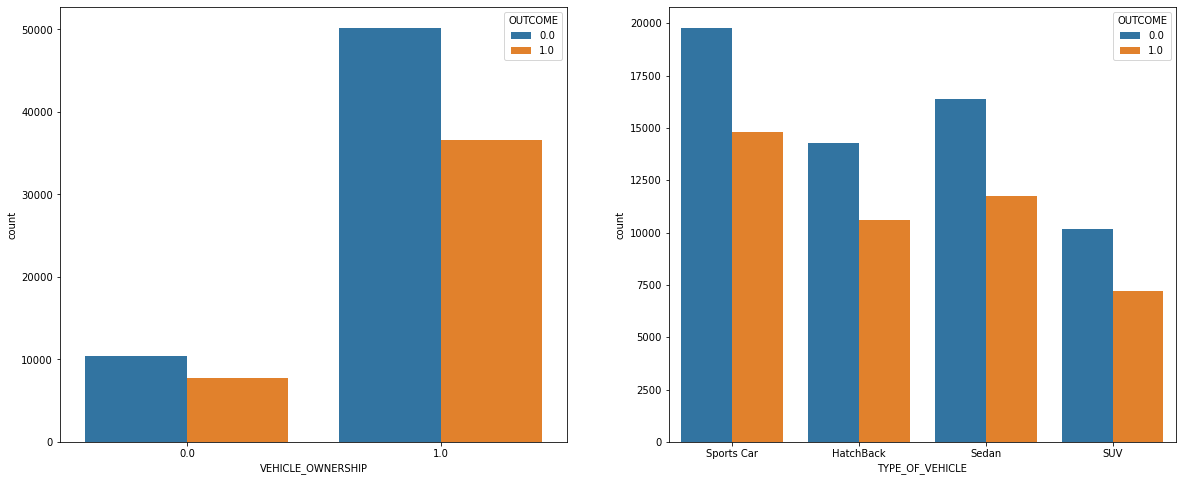

In [142]:
plt.figure(figsize=(20,8))

# VEHICLE_OWNERSHIP & Outcome
plt.subplot(1,2,1)
sns.countplot(x='VEHICLE_OWNERSHIP',hue='OUTCOME',data=df_train)

# TYPE_OF_VEHICLE & Outcome
plt.subplot(1,2,2)
sns.countplot(x='TYPE_OF_VEHICLE',hue='OUTCOME',data=df_train)

<AxesSubplot:xlabel='CHILDREN', ylabel='count'>

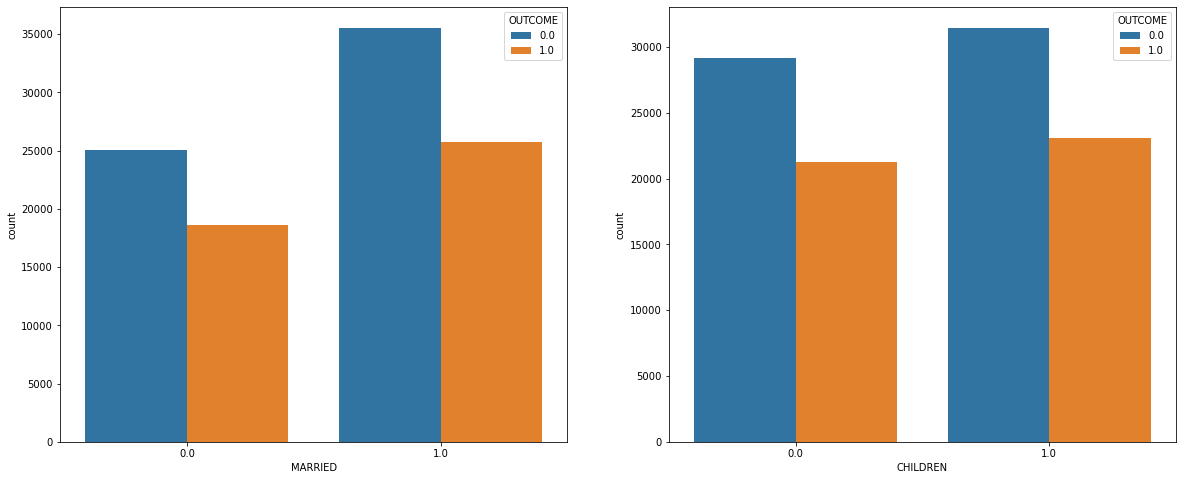

In [143]:
plt.figure(figsize=(20,8))

# MARRIED & Outcome
plt.subplot(1,2,1)
sns.countplot(x='MARRIED',hue='OUTCOME',data=df_train)

# CHILDREN & Outcome
plt.subplot(1,2,2)
sns.countplot(x='CHILDREN',hue='OUTCOME',data=df_train)

## Outlier Treatment for numerical columns

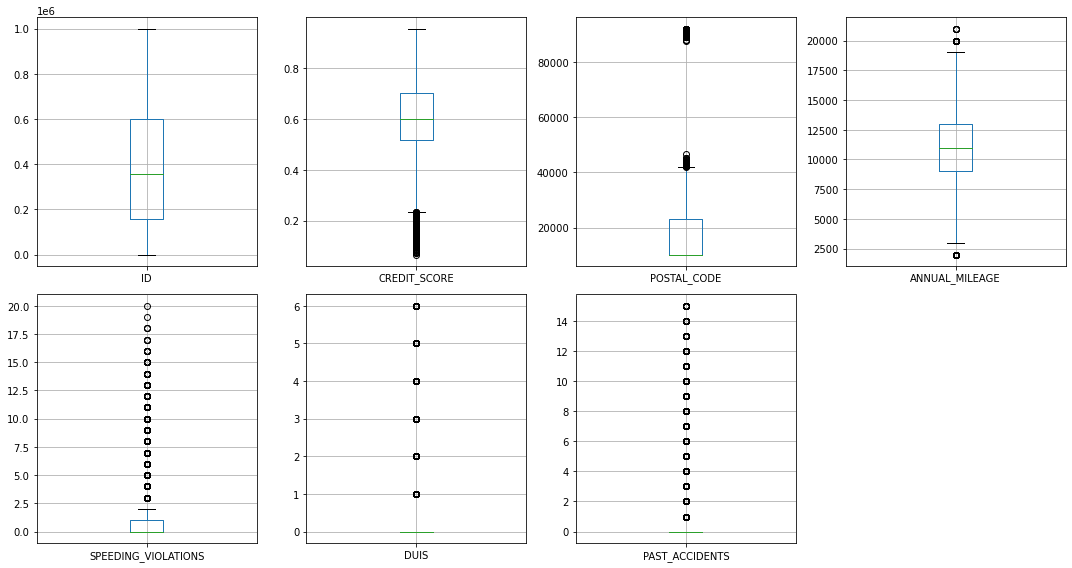

In [144]:
## Check for outliers for all numerical features using boxplot.
plt.figure(figsize=(15,8))
for feature, i in zip(num_list,range(1,9)):
    plt.subplot(2,4,i)
    df_train.boxplot(column=feature)
    plt.tight_layout() 

### Handling upper and lower whisker outliers

In [145]:
## Handling upper whisker outliers
upper=['SPEEDING_VIOLATIONS','DUIS','PAST_ACCIDENTS']

for feature in upper:
    p_98 = np.percentile(df_train[feature], 98)
    df_train.loc[df_train[feature] > p_98, feature] = p_98

## Handling lower whisker outliers
p_3 = np.percentile(df_train['CREDIT_SCORE'], 3)
df_train.loc[df_train['CREDIT_SCORE'] < p_3,'CREDIT_SCORE'] = p_3

### Checking features after outliers treatment

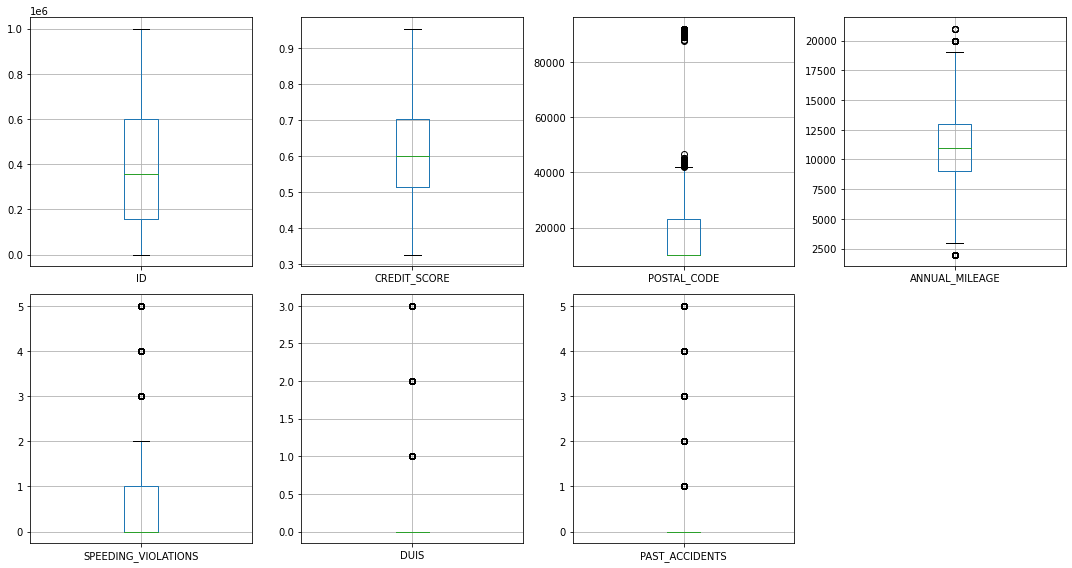

In [146]:
plt.figure(figsize=(15,8))
for feature, i in zip(num_list,range(1,9)):
    plt.subplot(2,4,i)
    df_train.boxplot(column=feature)
    plt.tight_layout()

## Multicollinearity

In [147]:
## Show the correlation between numericals features.
df_train.corr()

,ID,CREDIT_SCORE,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
ID,1.000000,0.005775,0.006400,-0.009844,-0.006446,0.001346,0.008273
CREDIT_SCORE,0.005775,1.000000,-0.005493,-0.020109,-0.006807,0.003742,-0.007935
POSTAL_CODE,0.006400,-0.005493,1.000000,0.007323,0.006436,0.008877,0.010818
ANNUAL_MILEAGE,-0.009844,-0.020109,0.007323,1.000000,-0.002345,0.004141,-0.003399
SPEEDING_VIOLATIONS,-0.006446,-0.006807,0.006436,-0.002345,1.000000,0.008403,0.006625
DUIS,0.001346,0.003742,0.008877,0.004141,0.008403,1.000000,0.007251
PAST_ACCIDENTS,0.008273,-0.007935,0.010818,-0.003399,0.006625,0.007251,1.000000


<AxesSubplot:>

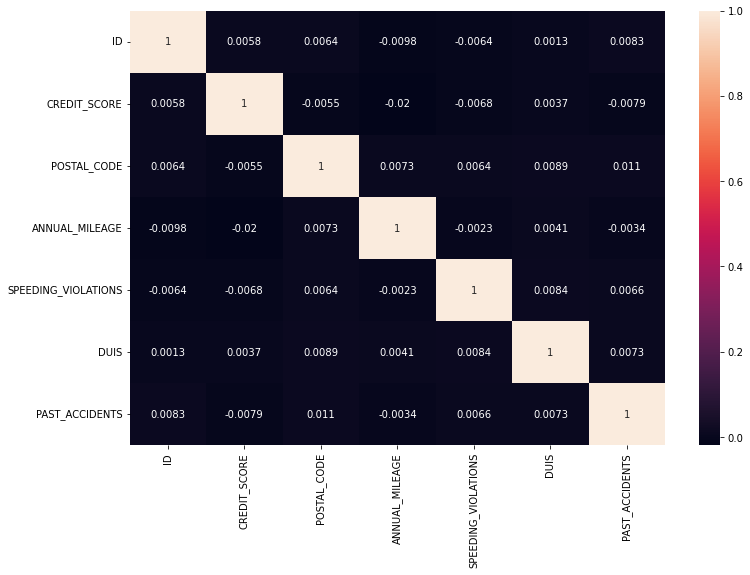

In [148]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(),annot=True)

### variance_inflation_factor

In [149]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [150]:
vif = pd.DataFrame()  ## Create empty dataframe
vif["variables"] = num_list
vif["VIF"] = [variance_inflation_factor(df_train[num_list].values, i) for i in range(df_train[num_list].shape[1])]

vif

,variables,VIF
0,ID,2.843713
1,CREDIT_SCORE,10.031931
2,POSTAL_CODE,2.106214
3,ANNUAL_MILEAGE,9.402458
4,SPEEDING_VIOLATIONS,1.302979
5,DUIS,1.054087
6,PAST_ACCIDENTS,1.199457


## Feature Distribution (Numerical)

In [151]:
len(num_list)

7

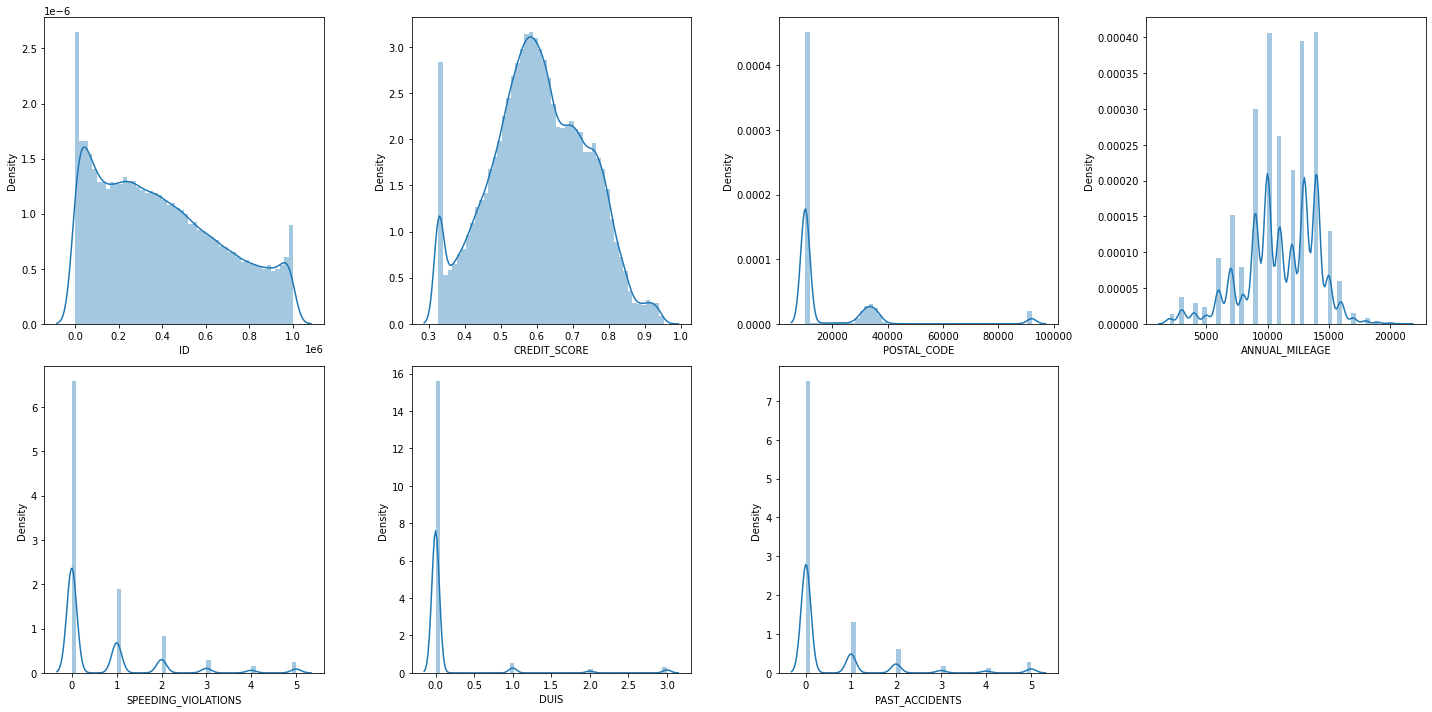

In [152]:
plt.figure(figsize=(20,10))
for feature,i in zip(num_list,range(1,9)):
    plt.subplot(2,4,i)
    sns.distplot(df_train[feature],kde=True)
    plt.tight_layout()

### Checking skewness value for numerical column

In [153]:
right_skewed={}
left_skewed={}
normal={}

for feature in df_train[num_list].columns:
    s=stats.skew(df_train[feature])
    if(s > 0):
        right_skewed[feature]=round(s,2)
    elif(s < 0):
        left_skewed[feature]=round(s,2)
    else:
        normal[feature]=round(s,2)

In [154]:
right_skewed

{'ID': 0.45,
 'POSTAL_CODE': 2.99,
 'SPEEDING_VIOLATIONS': 2.21,
 'DUIS': 4.75,
 'PAST_ACCIDENTS': 2.73}

In [155]:
for feature in right_skewed.keys():
    print(f"{feature} : {stats.skew(np.log(df_train[feature]+1))}")  # lognormal transformation

ID : -2.251506534303651
POSTAL_CODE : 1.522988511100856
SPEEDING_VIOLATIONS : 1.2757710577126427
DUIS : 4.130336062986334
PAST_ACCIDENTS : 1.788852087721594


In [156]:
for feature in right_skewed.keys():
    print(f"{feature} : {stats.skew(np.sqrt(df_train[feature]))}") # sqrt transformation

ID : -0.2730587213771592
POSTAL_CODE : 2.0855340809194574
SPEEDING_VIOLATIONS : 1.1089412780674637
DUIS : 3.936737378448988
PAST_ACCIDENTS : 1.626986538887017


In [157]:
## Right skewed feature transformation
df_train["POSTAL_CODE"] = np.log(df_train["POSTAL_CODE"]+1)
df_train["SPEEDING_VIOLATIONS"] = np.sqrt(df_train["SPEEDING_VIOLATIONS"])
df_train["DUIS"] = np.sqrt(df_train["SPEEDING_VIOLATIONS"])
df_train["PAST_ACCIDENTS"] = np.sqrt(df_train["PAST_ACCIDENTS"])

In [158]:
left_skewed

{'CREDIT_SCORE': -0.04, 'ANNUAL_MILEAGE': -0.51}

In [159]:
print(f"CREDIT_SCORE : {stats.skew(stats.boxcox(df_train['CREDIT_SCORE'])[0])}")
print(f"ANNUAL_MILEAGE : {stats.skew(stats.boxcox(df_train['ANNUAL_MILEAGE'])[0])}")

CREDIT_SCORE : -0.04071918311531636
ANNUAL_MILEAGE : -0.09077124214402951


In [160]:
## Left skewed feature transformation
df_train["ANNUAL_MILEAGE"] = stats.boxcox(df_train["ANNUAL_MILEAGE"])[0]

## Feature Analysis

In [161]:
df_train.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,0.0,0.0,10.528891,8.842932e+05,0.0,0.0,0.0,0.0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,1.0,0.0,9.233959,6.523248e+05,0.0,0.0,0.0,1.0,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,1.0,1.0,9.233959,1.008996e+06,0.0,0.0,0.0,1.0,Sedan
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,0.0,1.0,11.430630,3.527635e+05,1.0,1.0,0.0,1.0,Sedan
4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,1.0,1.0,10.377328,1.415204e+06,0.0,0.0,1.0,0.0,Sedan


#### ID & POSTAL_CODE 

In [162]:
df_train["ID"].nunique() ,df_train.shape[0]

(98485, 105000)

In [163]:
df_train["POSTAL_CODE"].nunique() ,df_train.shape[0]

(10937, 105000)

In [164]:
df_train["POSTAL_CODE"].value_counts()

9.233959     77608
11.430652     1325
11.430641      402
11.430630      155
11.430619      127
             ...  
10.503340        1
10.092992        1
10.203481        1
10.275809        1
9.949178         1
Name: POSTAL_CODE, Length: 10937, dtype: int64

Observation:
1. ID is just unique identifier column so better to drop it.
2. Postal_code having lot of distinct values so one hot encoding not recommended but we can use either frequency encoding.

#### AGE & INCOME

In [165]:
df_train["AGE"].value_counts()

40-64    33716
65+      32962
26-39    20018
16-25    18304
Name: AGE, dtype: int64

In [166]:
df_train["INCOME"].value_counts()

upper class      51271
working class    24454
middle class     14738
poverty          14537
Name: INCOME, dtype: int64

Observation:
- Apply label encoding for AGE and INCOME as their income based order w.r.t to age.

#### GENDER & EDUCATION

In [167]:
df_train["GENDER"].value_counts()

male      65317
female    39683
Name: GENDER, dtype: int64

In [168]:
df_train["EDUCATION"].value_counts()

high school    46590
university     31220
none           27190
Name: EDUCATION, dtype: int64

Observation:
1. One hot encode GENDER column
2. Label enocode EDUCATION column as it affects whether insurance claim is strong or not.

#### DRIVING_EXPERIENCE & VEHICLE_OWNERSHIP

In [169]:
df_train["DRIVING_EXPERIENCE"].value_counts()

20-29y    37493
0-9y      33111
10-19y    25101
30y+       9295
Name: DRIVING_EXPERIENCE, dtype: int64

In [170]:
df_train["VEHICLE_OWNERSHIP"].value_counts()

1.0    86839
0.0    18161
Name: VEHICLE_OWNERSHIP, dtype: int64

Observation:
- Label encode the DRIVING_EXPERIENCE column as experince major factor in insurance claim.

#### VEHICLE_YEAR & TYPE_OF_VEHICLE

In [171]:
df_train["VEHICLE_YEAR"].value_counts()

before 2015    57511
after 2015     47489
Name: VEHICLE_YEAR, dtype: int64

In [172]:
df_train["TYPE_OF_VEHICLE"].value_counts()

Sports Car    34592
Sedan         28120
HatchBack     24900
SUV           17388
Name: TYPE_OF_VEHICLE, dtype: int64

Observation:
- One hot encode both VEHICLE_YEAR & TYPE_OF_VEHICLE columns.

#### MARRIED & CHILDREN

In [173]:
df_train["MARRIED"].value_counts()

1.0    61335
0.0    43665
Name: MARRIED, dtype: int64

In [174]:
df_train["CHILDREN"].value_counts()

1.0    54600
0.0    50400
Name: CHILDREN, dtype: int64

## Data Preprocessing - Encoding

In [175]:
df_train.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,0.0,0.0,10.528891,8.842932e+05,0.0,0.0,0.0,0.0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,1.0,0.0,9.233959,6.523248e+05,0.0,0.0,0.0,1.0,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,1.0,1.0,9.233959,1.008996e+06,0.0,0.0,0.0,1.0,Sedan
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,0.0,1.0,11.430630,3.527635e+05,1.0,1.0,0.0,1.0,Sedan
4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,1.0,1.0,10.377328,1.415204e+06,0.0,0.0,1.0,0.0,Sedan


In [176]:
df_train["DRIVING_EXPERIENCE"].value_counts()

20-29y    37493
0-9y      33111
10-19y    25101
30y+       9295
Name: DRIVING_EXPERIENCE, dtype: int64

In [177]:
## Label Encoding
df_train["AGE"] = df_train["AGE"].map({'16-25':0,'26-39':1,'40-64':2,'65+':3})
df_train["INCOME"] = df_train["INCOME"].map({'poverty':0,'middle class':1,'working class':2,'upper class':3})
df_train["EDUCATION"] = df_train["EDUCATION"].map({'none':0,'high school':1,'university':2})
df_train["DRIVING_EXPERIENCE"] = df_train["DRIVING_EXPERIENCE"].map({'0-9y':0,'10-19y':1,'20-29y':2,'30y+':3})

In [178]:
## Fequency Encoding
pc_dict = df_train["POSTAL_CODE"].value_counts(normalize=True).to_dict()
df_train["POSTAL_CODE"] = df_train["POSTAL_CODE"].map(pc_dict)

In [179]:
## One hot encoding
encode_list = ['GENDER','VEHICLE_YEAR','TYPE_OF_VEHICLE']
df_train = pd.get_dummies(data=df_train,columns=encode_list,drop_first=True)

In [180]:
## Drop ID column
df_train.drop(columns=['ID','POSTAL_CODE'],axis=1,inplace=True)

In [181]:
df_train.head()

,AGE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,GENDER_male,VEHICLE_YEAR_before 2015,TYPE_OF_VEHICLE_SUV,TYPE_OF_VEHICLE_Sedan,TYPE_OF_VEHICLE_Sports Car
0,2,2,2,1,0.638050,0.0,0.0,0.0,8.842932e+05,0.0,0.0,0.0,0.0,0,0,0,0,1
1,1,2,1,1,0.475741,1.0,1.0,0.0,6.523248e+05,0.0,0.0,0.0,1.0,1,1,0,0,0
2,2,2,0,1,0.839817,1.0,1.0,1.0,1.008996e+06,0.0,0.0,0.0,1.0,1,1,0,1,0
3,2,2,1,3,0.682527,1.0,0.0,1.0,3.527635e+05,1.0,1.0,0.0,1.0,1,1,0,1,0
4,2,2,0,2,0.572184,1.0,1.0,1.0,1.415204e+06,0.0,0.0,1.0,0.0,0,0,0,1,0


In [182]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   AGE                         105000 non-null  int64   
 1   DRIVING_EXPERIENCE          105000 non-null  int64   
 2   EDUCATION                   105000 non-null  int64   
 3   INCOME                      105000 non-null  int64   
 4   CREDIT_SCORE                105000 non-null  float64 
 5   VEHICLE_OWNERSHIP           105000 non-null  category
 6   MARRIED                     105000 non-null  category
 7   CHILDREN                    105000 non-null  category
 8   ANNUAL_MILEAGE              105000 non-null  float64 
 9   SPEEDING_VIOLATIONS         105000 non-null  float64 
 10  DUIS                        105000 non-null  float64 
 11  PAST_ACCIDENTS              105000 non-null  float64 
 12  OUTCOME                     105000 non-null  category
 13 

# Model Building

## Spliting features & target values

In [183]:
x = df_train.drop("OUTCOME",axis=1)
y = df_train["OUTCOME"]

In [184]:
x.shape,y.shape

((105000, 17), (105000,))

## Spliting data into train and test

In [185]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size=0.3,shuffle=True,random_state = 56,stratify=y)

In [186]:
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((73500, 17), (31500, 17), (73500,), (31500,))

## Standardization

In [187]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)

### Model Training Function

In [188]:
def model_train_func(model):
    
    ## Fit on training data
    model.fit(x_train,y_train)
    
    ## Predict values using train data
    y_train_prob = model.predict_proba(x_train)[:,1]
    y_train_predict = model.predict(x_train)
    ## Predict values using validation data
    y_valid_prob = model.predict_proba(x_valid)[:,1]
    y_valid_predict = model.predict(x_valid)
    
    ## Model Evaluation
    # F1 score on train-test data
    train_f1score = f1_score(y_train,y_train_predict)
    valid_f1score = f1_score(y_valid,y_valid_predict)
    
    # Log loss for train & validation data
    train_logloss = log_loss(y_train,y_train_predict)
    valid_logloss = log_loss(y_valid,y_valid_predict)
    
    ## Confusion matrix
    cf_matrix=confusion_matrix(y_valid,y_valid_predict)
    print(cf_matrix)
    sns.heatmap(cf_matrix,annot=True)
    
    print(f"F1 score on train data ={train_f1score}")
    print(f"F1 score on validation data ={valid_f1score}")
    print(f"Log_loss on train data = {train_logloss}")
    print(f"log_loss on validation data = {valid_logloss}")
    print(classification_report(y_valid,y_valid_predict))
    
    return y_train_prob,y_valid_prob,valid_logloss,valid_f1score

In [189]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,StratifiedKFold

#Stratified k-Fold Cross Validation with shuffle split 
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=11)

## Model 1 : Logistic Regression

In [190]:
def Val_score_func(c_list):
    avg_logloss_score = []
    
    for i in c_list:
        logloss_score = cross_val_score(estimator= LogisticRegression(C=i,random_state=11,n_jobs=-1),
                                  X=x_train, y=y_train, cv=kfold, scoring='neg_log_loss')
        
        # Adding mean logloss_score to avg list
        avg_logloss_score.append(logloss_score.mean())
        
    return avg_logloss_score

In [191]:
# Cross validation
c_list = [0.00001,0.0001,0.001,0.01,0.1]
logreg_cv = Val_score_func(c_list)

In [192]:
pd.DataFrame({'C': c_list, 'logloss_score':logreg_cv}).sort_values(by=['logloss_score'],ascending=False)

,C,logloss_score
1,0.00010,-0.681066
0,0.00001,-0.681103
2,0.00100,-0.681113
3,0.01000,-0.681131
4,0.10000,-0.681135


Text(0.5, 1.0, 'Mean Validation score')

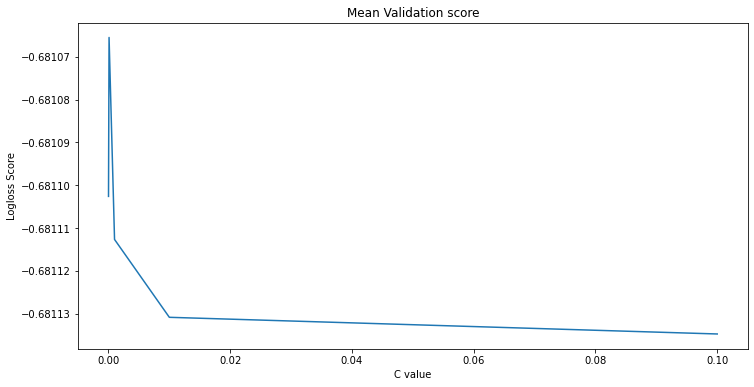

In [193]:
plt.figure(figsize=(12,6))
plt.plot(c_list,logreg_cv)
plt.xlabel('C value')
plt.ylabel('Logloss Score')
plt.title('Mean Validation score')

### Take C = 0.0001 as optimal value

[[9375 8812]
 [6630 6683]]
F1 score on train data =0.462508176250223
F1 score on validation data =0.4639683421271869
Log_loss on train data = 16.990483110510638
log_loss on validation data = 16.931899401357636
              precision    recall  f1-score   support

         0.0       0.59      0.52      0.55     18187
         1.0       0.43      0.50      0.46     13313

    accuracy                           0.51     31500
   macro avg       0.51      0.51      0.51     31500
weighted avg       0.52      0.51      0.51     31500



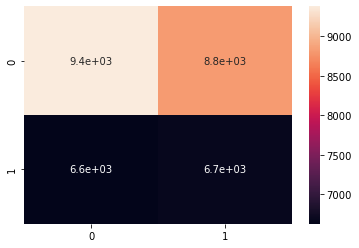

In [194]:
## Logistic Regression Model Building
model_logreg = LogisticRegression(penalty='l2',C=0.0001,solver='lbfgs',class_weight='balanced',
                                  verbose=0,random_state=11,n_jobs=-1)

y_train_prob_logreg,y_valid_prob_logreg,logloss_logreg,f1score_logreg = model_train_func(model_logreg)

## Model 2 : KNN Classifier

In [195]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [196]:
def Val_score_func(n_neighbors):
    avg_logloss_score = []
    
    for i in n_neighbors:
        logloss_score = cross_val_score(estimator= KNC(n_neighbors=i,weights='distance',n_jobs=-1),
                                  X=x_train, y=y_train, cv=kfold, scoring='neg_log_loss')
        
        # Adding mean logloss_score to avg list
        avg_logloss_score.append(logloss_score.mean())
        
    return avg_logloss_score

In [197]:
k = [101,201,301,401,501]
knn_cv = Val_score_func(k)

In [198]:
pd.DataFrame({'n_neighbors':k, 'logloss_score':knn_cv}).sort_values(by=['logloss_score'],ascending=False)

,n_neighbors,logloss_score
4,501,-0.685106
3,401,-0.685451
2,301,-0.685984
1,201,-0.687113
0,101,-0.690477


Text(0.5, 1.0, 'Mean Validation score')

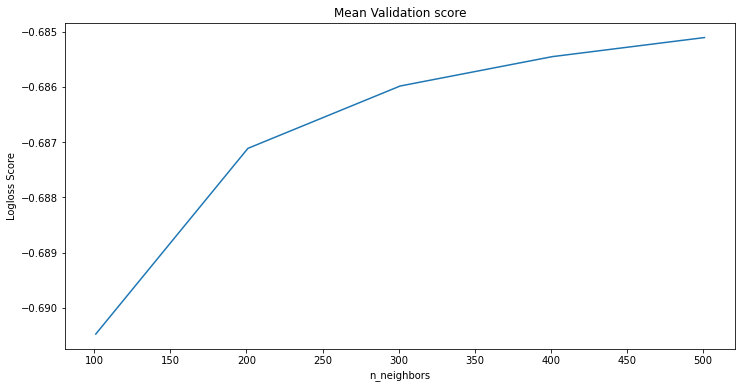

In [199]:
plt.figure(figsize=(12,6))
plt.plot(k,knn_cv)
plt.xlabel('n_neighbors')
plt.ylabel('Logloss Score')
plt.title('Mean Validation score')

### Take k = 501 as optimal value

[[18152    35]
 [13275    38]]
F1 score on train data =0.9999195171026156
F1 score on validation data =0.005677573584341851
Log_loss on train data = 0.002349576625505127
log_loss on validation data = 14.59400450165623
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.73     18187
         1.0       0.52      0.00      0.01     13313

    accuracy                           0.58     31500
   macro avg       0.55      0.50      0.37     31500
weighted avg       0.55      0.58      0.42     31500



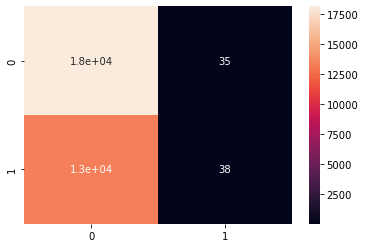

In [200]:
model_KNN = KNC(n_neighbors=501,weights='distance',n_jobs=-1)

y_train_prob_KNN,y_valid_prob_KNN,logloss_KNN,f1score_KNN = model_train_func(model_KNN)

## Model 3 : Support Vector Machine (SVM)

In [201]:
from sklearn import svm

In [202]:
def Val_score_func(c_list):
    avg_logloss_score = []
    
    for i in c_list:
        logloss_score = cross_val_score(estimator=svm.SVC(C=i,kernel='rbf',class_weight='balanced',random_state=11,probability=True),
                                  X=x_train, y=y_train, cv=kfold, scoring='neg_log_loss')
        
        # Adding mean logloss_score to avg list
        avg_logloss_score.append(logloss_score.mean())
        
    return avg_logloss_score

In [203]:
c_list = [0.01,0.1,1,5]
#svm_cv = Val_score_func(c_list)

In [204]:
model_SVM = svm.SVC(C=1,kernel='rbf',class_weight='balanced',random_state=11,probability=True)

#y_train_prob_SVM,y_valid_prob_SVM,logloss_SVM,f1score_SVM = model_train_func(model_SVM)

## Model 4 : Random Forest

In [205]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import RandomizedSearchCV

In [206]:
def Val_score_func(max_depth):
    avg_logloss_score = []
    
    for i in max_depth:
        logloss_score = cross_val_score(estimator=RFC(n_estimators=1000,max_depth=i,min_samples_split=12,min_samples_leaf=5,
                                                  max_features='sqrt',n_jobs=-1,random_state=11,class_weight='balanced'),
                                                      X=x_train, y=y_train, cv=kfold, scoring='neg_log_loss')
        # Adding mean logloss_score to avg list
        avg_logloss_score.append(logloss_score.mean())
        
    return avg_logloss_score

In [207]:
depth = [5,10,15,20,25,30]
#rfc_cv = Val_score_func(depth)

In [208]:
#pd.DataFrame({'max_depth':depth, 'logloss_score':rfc_cv}).sort_values(by=['logloss_score'],ascending=False)

In [209]:
"""plt.figure(figsize=(12,6))
plt.plot(depth,rfc_cv)
plt.xlabel('max_depth')
plt.ylabel('Logloss Score')
plt.title('Mean Validation score')"""

"plt.figure(figsize=(12,6))\nplt.plot(depth,rfc_cv)\nplt.xlabel('max_depth')\nplt.ylabel('Logloss Score')\nplt.title('Mean Validation score')"

### Take max_Depth = 15 as optimal value

[[11646  6541]
 [ 8469  4844]]
F1 score on train data =0.8542641472520665
F1 score on validation data =0.392258482468216
Log_loss on train data = 4.200617400740678
log_loss on validation data = 16.458167106488897
              precision    recall  f1-score   support

         0.0       0.58      0.64      0.61     18187
         1.0       0.43      0.36      0.39     13313

    accuracy                           0.52     31500
   macro avg       0.50      0.50      0.50     31500
weighted avg       0.51      0.52      0.52     31500



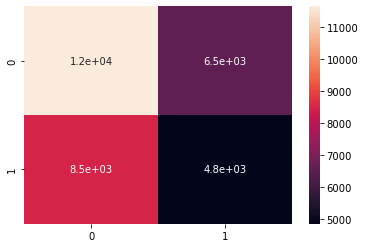

In [210]:
model_RFC = RFC(n_estimators=1000,max_depth=15,min_samples_split=12,min_samples_leaf=5,
                max_features='sqrt',n_jobs=-1,random_state=11,class_weight='balanced')

y_train_prob_RFC,y_valid_prob_RFC,logloss_RFC,f1score_RFC = model_train_func(model_RFC)

## Model 5 : XGBOOST Model

In [211]:
import xgboost as xgb

In [212]:
def Val_score_func(max_depth):
    avg_logloss_score = []
    
    for i in max_depth:
        logloss_score = cross_val_score(estimator=xgb.XGBClassifier(n_estimators=200,max_depth=i,n_jobs=-1,subsample=0.9),
                                        X=x_train, y=y_train, cv=kfold, scoring='neg_log_loss')
        # Adding mean logloss_score to avg list
        avg_logloss_score.append(logloss_score.mean())
        
    return avg_logloss_score

In [213]:
depth = [1,3,5,7,9]
#xgb_cv = Val_score_func(depth)

In [214]:
#pd.DataFrame({'max_depth':depth, 'logloss_score':xgb_cv}).sort_values(by=['logloss_score'],ascending=False)

In [215]:
"""plt.figure(figsize=(12,6))
plt.plot(depth,xgb_cv)
plt.xlabel('max_depth')
plt.ylabel('Logloss Score')
plt.title('Mean Validation score')"""

"plt.figure(figsize=(12,6))\nplt.plot(depth,xgb_cv)\nplt.xlabel('max_depth')\nplt.ylabel('Logloss Score')\nplt.title('Mean Validation score')"

### Take max_depth=1 as optimal value

[[18170    17]
 [13301    12]]
F1 score on train data =0.0018644122279726128
F1 score on validation data =0.0017988307600059962
Log_loss on train data = 14.591340922888888
log_loss on validation data = 14.60277579747863
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.73     18187
         1.0       0.41      0.00      0.00     13313

    accuracy                           0.58     31500
   macro avg       0.50      0.50      0.37     31500
weighted avg       0.51      0.58      0.42     31500



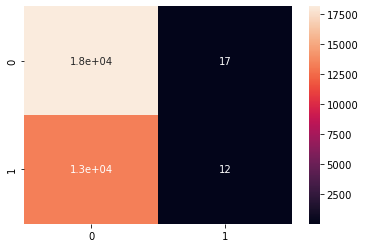

In [216]:
model_XGB = xgb.XGBClassifier(n_estimators=200,max_depth=1,n_jobs=-1,subsample=0.9)

y_train_prob_XGB,y_valid_prob_XGB,logloss_XGB,f1score_XGB = model_train_func(model_XGB)

## Model Performance Comparision

In [217]:
model=['Logistic Regression','KNN','Support Vector Machine','Random Forest','XGBoost']
f_score=[f1score_logreg,f1score_KNN,np.nan,f1score_RFC,f1score_XGB]
log_loss_error = [logloss_logreg,logloss_KNN,np.nan,logloss_RFC,logloss_XGB]

model_df=pd.DataFrame({"Model":model,"Log_loss":log_loss_error,"F1_score":f_score})
model_df.sort_values(by=["F1_score"],ascending=True)

,Model,Log_loss,F1_score
4,XGBoost,14.602776,0.001799
1,KNN,14.594005,0.005678
3,Random Forest,16.458167,0.392258
0,Logistic Regression,16.931899,0.463968
2,Support Vector Machine,NaN,NaN


## Model Pipeline (Test Data)

In [218]:
df_test

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE
0,352928,40-64,male,10-19y,none,working class,0.814707,1.0,after 2015,0.0,1.0,10238,10000.0,0,0,0,HatchBack
1,38579,26-39,female,20-29y,high school,upper class,0.344051,1.0,before 2015,0.0,0.0,34073,13000.0,0,0,0,Sedan
2,504022,40-64,male,10-19y,none,upper class,0.620691,0.0,after 2015,1.0,0.0,10238,12000.0,0,0,0,SUV
3,202404,26-39,male,20-29y,high school,upper class,0.689658,1.0,after 2015,1.0,1.0,10238,16000.0,1,0,0,SUV
4,527913,65+,male,10-19y,none,middle class,0.755666,0.0,after 2015,0.0,1.0,92101,14000.0,2,0,0,HatchBack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,117683,65+,female,20-29y,high school,poverty,0.472022,1.0,before 2015,1.0,0.0,10238,10000.0,0,0,1,Sports Car
44996,619620,40-64,male,20-29y,university,working class,0.757312,0.0,before 2015,1.0,0.0,10238,12000.0,0,0,0,Sports Car
44997,11086,40-64,male,10-19y,none,poverty,0.566764,0.0,after 2015,0.0,0.0,10238,13000.0,0,0,0,Sedan
44998,31717,65+,male,30y+,high school,upper class,0.741850,1.0,before 2015,1.0,0.0,92101,13000.0,1,0,0,Sports Car


In [219]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   45000 non-null  int64  
 1   AGE                  45000 non-null  object 
 2   GENDER               45000 non-null  object 
 3   DRIVING_EXPERIENCE   45000 non-null  object 
 4   EDUCATION            45000 non-null  object 
 5   INCOME               45000 non-null  object 
 6   CREDIT_SCORE         45000 non-null  float64
 7   VEHICLE_OWNERSHIP    45000 non-null  float64
 8   VEHICLE_YEAR         45000 non-null  object 
 9   MARRIED              45000 non-null  float64
 10  CHILDREN             45000 non-null  float64
 11  POSTAL_CODE          45000 non-null  int64  
 12  ANNUAL_MILEAGE       45000 non-null  float64
 13  SPEEDING_VIOLATIONS  45000 non-null  int64  
 14  DUIS                 45000 non-null  int64  
 15  PAST_ACCIDENTS       45000 non-null 

In [220]:
# Change datatype to category
df_test["MARRIED"] = df_test["MARRIED"].astype('category')
df_test["CHILDREN"] = df_test["CHILDREN"].astype('category')
df_test["VEHICLE_OWNERSHIP"] = df_test["VEHICLE_OWNERSHIP"].astype('category')

In [221]:
## Null values
df_test.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
TYPE_OF_VEHICLE        0
dtype: int64

In [222]:
def model_pipline_func(df):
    ## Right skewed feature transformation
    df["POSTAL_CODE"] = np.log(df["POSTAL_CODE"]+1)
    df["SPEEDING_VIOLATIONS"] = np.sqrt(df["SPEEDING_VIOLATIONS"])
    df["DUIS"] = np.sqrt(df["SPEEDING_VIOLATIONS"])
    df["PAST_ACCIDENTS"] = np.sqrt(df["PAST_ACCIDENTS"])
    
    ## Left skewed feature transformation
    df["ANNUAL_MILEAGE"] = stats.boxcox(df["ANNUAL_MILEAGE"])[0]
    
    ## Label Encoding
    df["AGE"] = df["AGE"].map({'16-25':0,'26-39':1,'40-64':2,'65+':3})
    df["INCOME"] = df["INCOME"].map({'poverty':0,'middle class':1,'working class':2,'upper class':3})
    df["EDUCATION"] = df["EDUCATION"].map({'none':0,'high school':1,'university':2})
    df["DRIVING_EXPERIENCE"] = df["DRIVING_EXPERIENCE"].map({'0-9y':0,'10-19y':1,'20-29y':2,'30y+':3})
    
    ## Fequency Encoding
    pc_dict = df["POSTAL_CODE"].value_counts(normalize=True).to_dict()
    df["POSTAL_CODE"] = df["POSTAL_CODE"].map(pc_dict)
    
    ## One hot encoding
    df_final = pd.get_dummies(data=df,columns=['GENDER','VEHICLE_YEAR','TYPE_OF_VEHICLE'],drop_first=True)
    
    ## Drop ID column
    df_final.drop(columns=['ID','POSTAL_CODE'],axis=1,inplace=True)
    
    ## Standardization
    df_final = scaler.transform(df_final)
    
    return df_final

In [223]:
x_test = model_pipline_func(df_test)

In [224]:
x_test

array([[ 0.21034141, -0.22028604, -1.39444223, ..., -0.44339675,
        -0.60719815, -0.70014799],
       [-0.72239424,  0.79026346, -0.05104894, ..., -0.44339675,
         1.64690883, -0.70014799],
       [ 0.21034141, -0.22028604, -1.39444223, ...,  2.25531649,
        -0.60719815, -0.70014799],
       ...,
       [ 0.21034141, -0.22028604, -1.39444223, ..., -0.44339675,
         1.64690883, -0.70014799],
       [ 1.14307705,  1.80081297, -0.05104894, ..., -0.44339675,
        -0.60719815,  1.42826947],
       [ 1.14307705, -0.22028604, -0.05104894, ..., -0.44339675,
        -0.60719815,  1.42826947]])

In [225]:
x_test.shape

(45000, 17)

## Model Prediction

In [226]:
y_test_predict_logreg = model_logreg.predict(x_test)
y_test_predict_KNN = model_KNN.predict(x_test)
y_test_predict_RFC = model_RFC.predict(x_test)
y_test_predict_XGB = model_XGB.predict(x_test)

In [227]:
y_test_predict_XGB

array([0, 0, 0, ..., 0, 0, 0])

In [228]:
df_prediction = pd.DataFrame({'Logistic':y_test_predict_logreg,'KNN':y_test_predict_KNN,'RFC':y_test_predict_RFC,
                              'XGB':y_test_predict_XGB})
df_prediction

,Logistic,KNN,RFC,XGB
0,1.0,0.0,0.0,0
1,1.0,0.0,0.0,0
2,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0
4,1.0,0.0,0.0,0
...,...,...,...,...
44995,1.0,0.0,1.0,0
44996,0.0,0.0,0.0,0
44997,1.0,0.0,0.0,0
44998,1.0,0.0,0.0,0


In [229]:
df_prediction['XGB'].value_counts()

0    44964
1       36
Name: XGB, dtype: int64

In [230]:
df_prediction['RFC'].value_counts()

0.0    28648
1.0    16352
Name: RFC, dtype: int64

In [231]:
df_prediction['KNN'].value_counts()

0.0    44977
1.0       23
Name: KNN, dtype: int64

In [232]:
df_prediction['Logistic'].value_counts()

0.0    22716
1.0    22284
Name: Logistic, dtype: int64

In [233]:
# Prediction based on xgboost model
submission_XGB = pd.DataFrame({"OUTCOME":y_test_predict_XGB})
# Prediction based on Random Forest model
submission_RFC = pd.DataFrame({"OUTCOME":y_test_predict_RFC})

In [234]:
submission_XGB.to_csv(r"C:\Users\Shree\Desktop\DS Projects\Analytics Olymipad\Submission\submission_xgb.csv")
submission_RFC.to_csv(r"C:\Users\Shree\Desktop\DS Projects\Analytics Olymipad\Submission\submission_rfc.csv")

In [235]:
submission_RFC.shape

(45000, 1)

In [115]:
import random

In [116]:
random_list = [0]*(25980) + [1]*(45000-25980)

In [117]:
random.shuffle(random_list)

In [119]:
len(random_list)

45000

In [120]:
submission_random = pd.DataFrame({"OUTCOME":random_list})
submission_random

,OUTCOME
0,1
1,0
2,1
3,1
4,0
...,...
44995,1
44996,1
44997,1
44998,1


In [121]:
submission_random.to_csv(r"C:\Users\Shree\Desktop\DS Projects\Analytics Olymipad\Submission\submission_random.csv")